# Keras 基于 ImageDataGenerator 的 Data Augmentation实现

MNIST, Fashion_MNIST等数据集为我们提供了很多的training and test 数据，但有些时候我们需要我们自己的数据集或者是测试/验证集，那这个时候我们就得`制作自己的数据集`了! 本文就介绍一下如何使用 Keras 提供的 **ImageDataGenerator**来制作自己的图片数据集


# 目录
- [1.Keras ImageDataGenerator简介](#1.-Keras-ImageDataGenerator简介)
- [2.代码实现](#2.-代码实现)


https://blog.csdn.net/weiwei9363/article/details/78635674


# 1. Keras ImageDataGenerator简介

详细的请参见ImageDataGenerator的[官方说明](https://keras.io/preprocessing/image/):

更详细的参数说明[ImageDataGenerator中文说明](http://keras-cn.readthedocs.io/en/latest/preprocessing/image/)
```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```

**参数详解**

| Paramenter Name | Description | Values |
| :---            | :---        | :---   |
| featurewise_center| "Set input mean to 0 over the dataset, feature-wise." 大意为使数据集去中心化（使得其均值为0）| True/False |
| samplewise_std_normalization| “Divide inputs by std of the dataset, feature-wise.”，大意为将输入的每个样本除以其自身的标准差| True/False|
| rotation_range| rotation range的作用是用户指定旋转角度范围| 整数或者是 0~1之间的小数|
| zoom_range| 让图片在长或宽的方向进行放大| zoom_range(0.1)，那么把原图的w,h随机放缩到w/h*(0.9--1.1)范围内)|
| channel_shift_range| 可以理解成改变图片的颜色，通过对颜色通道的数值偏移，改变图片的整体的颜色，这意味着是“整张图”呈现某一种颜色| 大于等于0的整数|
| horizontal_flip| 随机对图片执行水平翻转操作，意味着不一定对所有图片都会执行水平翻转，每次生成均是随机选取图片进行翻转| True/False|
| vertical_flip| vertical_flip是作用是对图片执行上下翻转操作，和horizontal_flip一样，每次生成均是随机选取图片进行翻转| True/False|
| rescale| rescale的作用是对图片的每个像素值均乘上这个放缩因子，这个操作在所有其它变换操作之前执行，在一些模型当中，直接输入原图的像素值可能会落入激活函数的“死亡区”，因此设置放缩因子为1/255，把像素值放缩到0和1之间有利于模型的收敛，避免神经元“死亡”| |
| width_shift_range| 水平位置平移| [0, 1]的浮点数，也可以大于1，其最大平移距离为图片长或宽的尺寸乘以参数，同样平移距离并不固定为最大平移距离，平移距离在 [0, 最大平移距离] 区间内|
| height_shift_range| 垂直位置平移| [0, 1]的浮点数，也可以大于1，其最大平移距离为图片长或宽的尺寸乘以参数，同样平移距离并不固定为最大平移距离，平移距离在 [0, 最大平移距离] 区间内|
| fill_mode| fill_mode为填充模式，如前面提到，当对图片进行平移、放缩、错切等操作时，图片中会出现一些缺失的地方，那这些缺失的地方该用什么方式补全呢？就由fill_mode中的参数确定| “constant”、“nearest”（默认）、“reflect”和“wrap”|


# 2. 代码实现

In [103]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

path = '../data/my-dataset-images/fashion_samples/'
gen_path = '../data/my-dataset-images/fashion_samples_gen/'

In [104]:
glob.glob(path+'*/*')

['../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-01.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-02.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-03.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-04.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-05.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-06.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-07.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-08.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-09.png',
 '../data/my-dataset-images/fashion_samples/T-Shirt/T-Shirt-10.png']

In [60]:
def show_imgs(path):
    files = glob.glob(path)
    fig = plt.figure(figsize=(20,20))
    n = len(files)
    for i in range(len(files)):
        img = Image.open(files[i])
        plt.subplot(1,n,i+1)
        plt.imshow(img)
        
    plt.show()    
    return fig


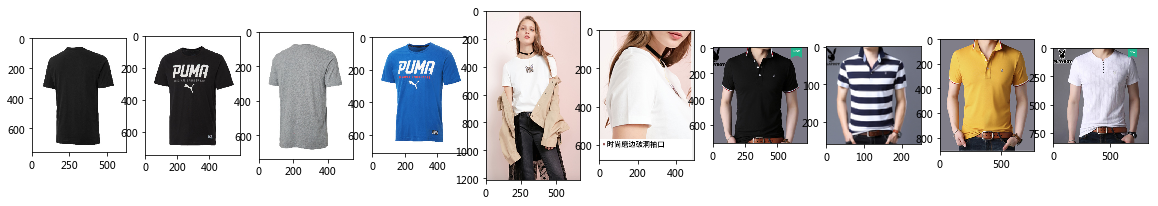

In [105]:
fig = show_imgs(path+'*/*')

In [62]:
fig.savefig(gen_path+'origin.png', dpi=200, papertype='a5')

In [106]:

dagen = ImageDataGenerator()

gen_data = dagen.flow_from_directory(path,
                         batch_size=1,
                         shuffle=False, 
                         save_to_dir=gen_path,
                         save_prefix='_gen'
                         )

Found 10 images belonging to 1 classes.


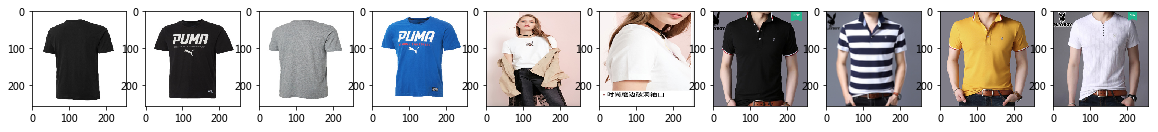

In [73]:
gen_data.next() 
fig = show_imgs(gen_path+'*') 

Found 10 images belonging to 1 classes.


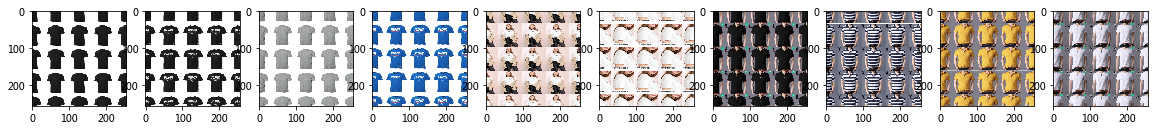

In [74]:
dagen = ImageDataGenerator(fill_mode='wrap', zoom_range=[4, 4])

gen_data = dagen.flow_from_directory(path,
                         batch_size=32,
                         shuffle=False,
                         save_to_dir=gen_path,
                         save_prefix='_gen' 
                         )
gen_data.next() 
fig = show_imgs(gen_path+'*') 

Found 10 images belonging to 1 classes.


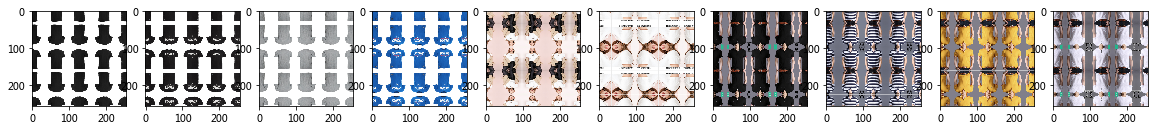

In [75]:
# “constant”、“nearest”（默认）、“reflect”和“wrap”|
dagen = ImageDataGenerator(fill_mode='reflect', zoom_range=[4, 4])

gen_data = dagen.flow_from_directory(path,
                         batch_size=32,
                         shuffle=False,
                         save_to_dir=gen_path,
                         save_prefix='_gen' 
                         )
gen_data.next() 
fig = show_imgs(gen_path+'*') 

Found 10 images belonging to 1 classes.


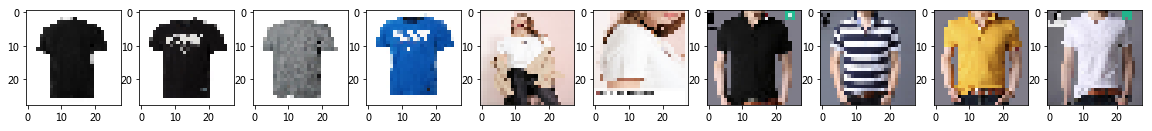

In [107]:
dagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

gen_data = dagen.flow_from_directory(path,
                         batch_size=32,
                         shuffle=False,
                         save_to_dir=gen_path,
                         save_prefix='_gen',
                         target_size=(28,28)            
                         )
gen_data.next() 
fig = show_imgs(gen_path+'*')

Found 10 images belonging to 1 classes.


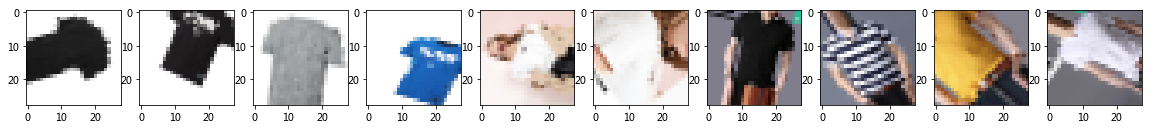

In [110]:
dagen = ImageDataGenerator(rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.3)

gen_data = dagen.flow_from_directory(path,
                         batch_size=32,
                         shuffle=False,
                         save_to_dir=gen_path,
                         save_prefix='_gen',
                         target_size=(28,28)            
                         )
gen_data.next() 
fig = show_imgs(gen_path+'*')

